Tingkat Kelayakan Kredit: 5.38


C:\Users\Aulia\AppData\Local\Programs\Python\Python312\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


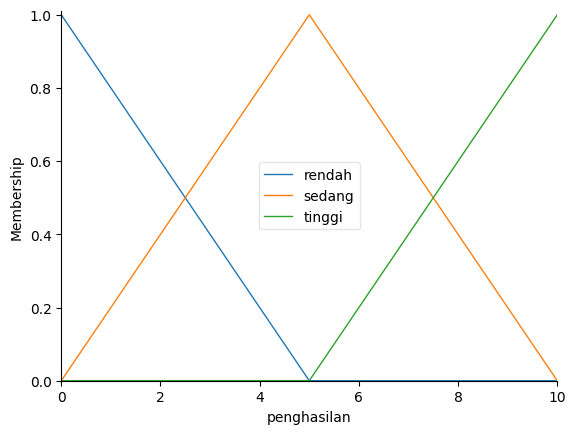

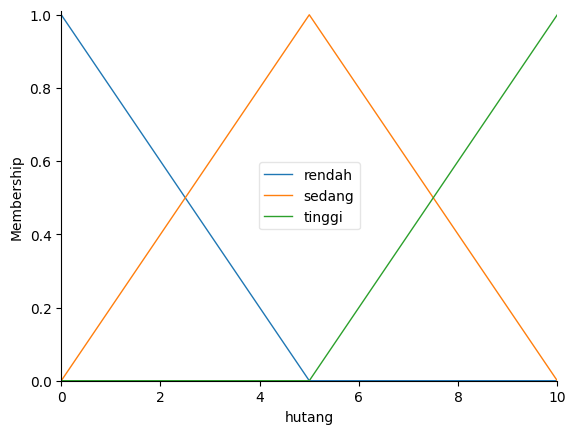

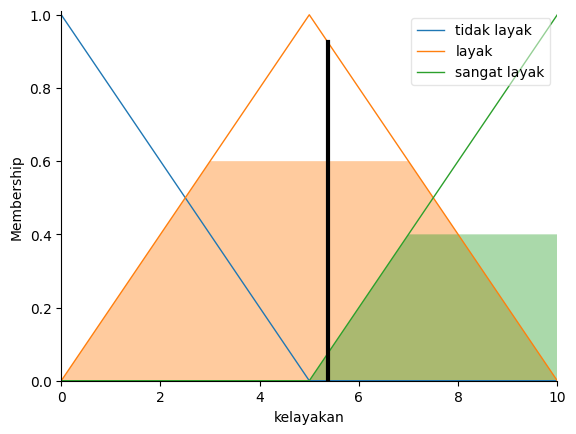

In [1]:
# 1. Sistem Penilaian Kelayakan Kredit
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# 1. Definisikan variabel input dan output
# Variabel input: Penghasilan, Hutang
# Variabel output: Kelayakan Kredit

penghasilan = ctrl.Antecedent(np.arange(0, 11, 1), 'penghasilan')
hutang = ctrl.Antecedent(np.arange(0, 11, 1), 'hutang')
kelayakan = ctrl.Consequent(np.arange(0, 11, 1), 'kelayakan')

# 2. Definisikan himpunan fuzzy untuk masing-masing variabel
# Penghasilan: Rendah, Sedang, Tinggi
penghasilan['rendah'] = fuzz.trimf(penghasilan.universe, [0, 0, 5])
penghasilan['sedang'] = fuzz.trimf(penghasilan.universe, [0, 5, 10])
penghasilan['tinggi'] = fuzz.trimf(penghasilan.universe, [5, 10, 10])

# Hutang: Rendah, Sedang, Tinggi
hutang['rendah'] = fuzz.trimf(hutang.universe, [0, 0, 5])
hutang['sedang'] = fuzz.trimf(hutang.universe, [0, 5, 10])
hutang['tinggi'] = fuzz.trimf(hutang.universe, [5, 10, 10])

# Kelayakan Kredit: Tidak Layak, Layak, Sangat Layak
kelayakan['tidak layak'] = fuzz.trimf(kelayakan.universe, [0, 0, 5])
kelayakan['layak'] = fuzz.trimf(kelayakan.universe, [0, 5, 10])
kelayakan['sangat layak'] = fuzz.trimf(kelayakan.universe, [5, 10, 10])

# 3. Definisikan aturan fuzzy (rule base)
rule1 = ctrl.Rule(penghasilan['rendah'] & hutang['tinggi'], kelayakan['tidak layak'])
rule2 = ctrl.Rule(penghasilan['sedang'] & hutang['sedang'], kelayakan['layak'])
rule3 = ctrl.Rule(penghasilan['tinggi'] & hutang['rendah'], kelayakan['sangat layak'])
rule4 = ctrl.Rule(penghasilan['tinggi'] & hutang['tinggi'], kelayakan['layak'])
rule5 = ctrl.Rule(penghasilan['rendah'] & hutang['rendah'], kelayakan['tidak layak'])

# 4. Buat sistem kontrol fuzzy
kelayakan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
kelayakan_simulasi = ctrl.ControlSystemSimulation(kelayakan_ctrl)

# 5. Simulasikan sistem dengan nilai input tertentu
# Contoh input: Penghasilan = 7, Hutang = 3
kelayakan_simulasi.input['penghasilan'] = 7
kelayakan_simulasi.input['hutang'] = 3

# Lakukan proses komputasi
kelayakan_simulasi.compute()

# Tampilkan hasil
tingkat_kelayakan = kelayakan_simulasi.output['kelayakan']
print(f"Tingkat Kelayakan Kredit: {tingkat_kelayakan:.2f}")

# Visualisasi hasil
penghasilan.view()
hutang.view()
kelayakan.view(sim=kelayakan_simulasi)


Tingkat Kelayakan Kredit: 5.48


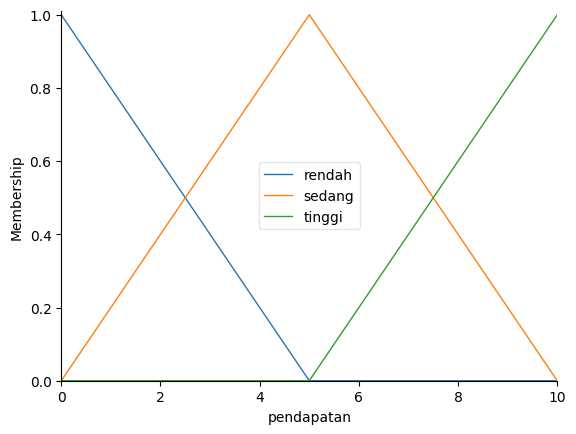

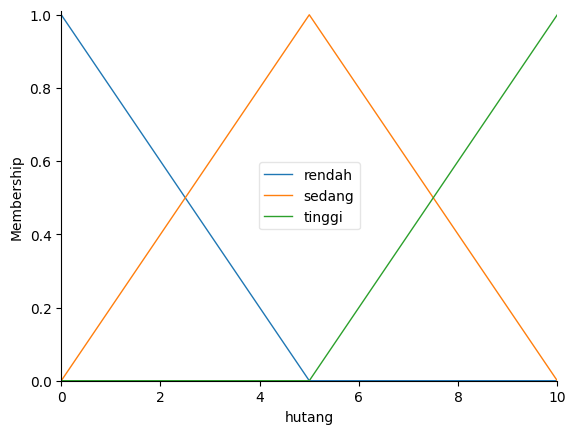

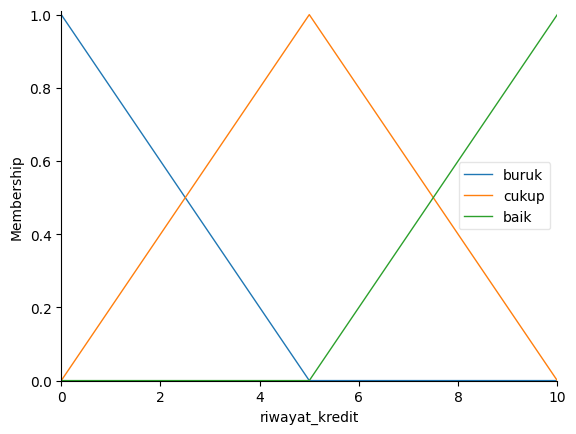

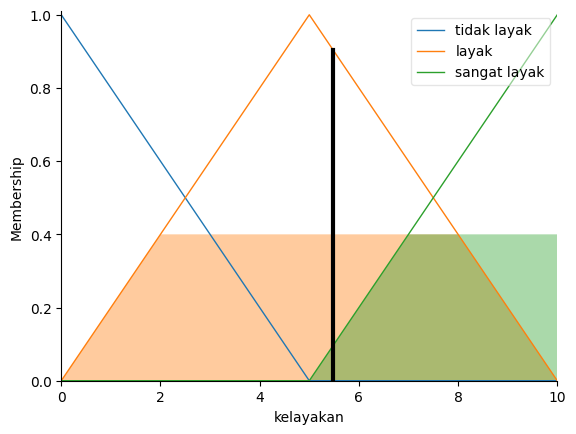

In [2]:
# 2. Buat sistem untuk menentukan kelayakan kredit berdasarkan parameter seperti pendapatan bulanan, hutang dan riwayat kredit.
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# 1. Definisikan variabel input dan output
# Variabel input: Pendapatan Bulanan, Hutang, Riwayat Kredit
# Variabel output: Kelayakan Kredit

pendapatan = ctrl.Antecedent(np.arange(0, 11, 1), 'pendapatan')
hutang = ctrl.Antecedent(np.arange(0, 11, 1), 'hutang')
riwayat_kredit = ctrl.Antecedent(np.arange(0, 11, 1), 'riwayat_kredit')
kelayakan = ctrl.Consequent(np.arange(0, 11, 1), 'kelayakan')

# 2. Definisikan himpunan fuzzy untuk masing-masing variabel
# Pendapatan Bulanan: Rendah, Sedang, Tinggi
pendapatan['rendah'] = fuzz.trimf(pendapatan.universe, [0, 0, 5])
pendapatan['sedang'] = fuzz.trimf(pendapatan.universe, [0, 5, 10])
pendapatan['tinggi'] = fuzz.trimf(pendapatan.universe, [5, 10, 10])

# Hutang: Rendah, Sedang, Tinggi
hutang['rendah'] = fuzz.trimf(hutang.universe, [0, 0, 5])
hutang['sedang'] = fuzz.trimf(hutang.universe, [0, 5, 10])
hutang['tinggi'] = fuzz.trimf(hutang.universe, [5, 10, 10])

# Riwayat Kredit: Buruk, Cukup, Baik
riwayat_kredit['buruk'] = fuzz.trimf(riwayat_kredit.universe, [0, 0, 5])
riwayat_kredit['cukup'] = fuzz.trimf(riwayat_kredit.universe, [0, 5, 10])
riwayat_kredit['baik'] = fuzz.trimf(riwayat_kredit.universe, [5, 10, 10])

# Kelayakan Kredit: Tidak Layak, Layak, Sangat Layak
kelayakan['tidak layak'] = fuzz.trimf(kelayakan.universe, [0, 0, 5])
kelayakan['layak'] = fuzz.trimf(kelayakan.universe, [0, 5, 10])
kelayakan['sangat layak'] = fuzz.trimf(kelayakan.universe, [5, 10, 10])

# 3. Definisikan aturan fuzzy (rule base)
rule1 = ctrl.Rule(pendapatan['rendah'] & hutang['tinggi'] & riwayat_kredit['buruk'], kelayakan['tidak layak'])
rule2 = ctrl.Rule(pendapatan['sedang'] & hutang['sedang'] & riwayat_kredit['cukup'], kelayakan['layak'])
rule3 = ctrl.Rule(pendapatan['tinggi'] & hutang['rendah'] & riwayat_kredit['baik'], kelayakan['sangat layak'])
rule4 = ctrl.Rule(pendapatan['tinggi'] & hutang['tinggi'] & riwayat_kredit['cukup'], kelayakan['layak'])
rule5 = ctrl.Rule(pendapatan['rendah'] & hutang['rendah'] & riwayat_kredit['baik'], kelayakan['tidak layak'])

# 4. Buat sistem kontrol fuzzy
kelayakan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
kelayakan_simulasi = ctrl.ControlSystemSimulation(kelayakan_ctrl)

# 5. Simulasikan sistem dengan nilai input tertentu
# Contoh input: Pendapatan = 7, Hutang = 3, Riwayat Kredit = 8
kelayakan_simulasi.input['pendapatan'] = 7
kelayakan_simulasi.input['hutang'] = 3
kelayakan_simulasi.input['riwayat_kredit'] = 8

# Lakukan proses komputasi
kelayakan_simulasi.compute()

# Tampilkan hasil
tingkat_kelayakan = kelayakan_simulasi.output['kelayakan']
print(f"Tingkat Kelayakan Kredit: {tingkat_kelayakan:.2f}")

# Visualisasi hasil
pendapatan.view()
hutang.view()
riwayat_kredit.view()
kelayakan.view(sim=kelayakan_simulasi)
